In [22]:
import geopandas as gpd

roads = gpd.read_file("C:/Users/omair/Downloads/texas-251124-free.shp/gis_osm_roads_free_1.shp")
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4342988,5111,motorway,Sam Rayburn Tollway,SRT,F,112,0,F,F,"LINESTRING (-97.00107 32.98973, -97.0021 32.99..."
1,4343083,5111,motorway,Sam Rayburn Tollway,SRT,F,112,0,F,F,"LINESTRING (-97.00623 32.99057, -97.00568 32.9..."
2,4343084,5111,motorway,Sam Rayburn Tollway,SRT,F,112,1,T,F,"LINESTRING (-96.99295 32.98645, -96.99329 32.9..."
3,4343087,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-96.99882 32.98826, -96.9981 32.98..."
4,4343088,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-96.99669 32.98806, -96.99731 32.9..."


In [24]:
roads.shape

(3770917, 11)

In [40]:
roads.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

In [239]:
roads['fclass'].value_counts()

fclass
service           1813323
residential        832357
footway            483189
secondary          146779
track              126337
tertiary            84391
primary             50745
unclassified        40700
path                32993
motorway            31029
motorway_link       25680
secondary_link      23476
cycleway            23020
trunk               17893
primary_link         9502
trunk_link           7880
tertiary_link        5500
steps                4682
track_grade5         3550
pedestrian           2198
track_grade3         2026
track_grade4         1581
track_grade2         1265
track_grade1          303
bridleway             295
living_street         153
busway                 48
unknown                22
Name: count, dtype: int64

In [241]:
backbone_classes = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "motorway_link", "trunk_link", "primary_link",
    "secondary_link", "tertiary_link",
]

roads_2 = roads[roads["fclass"].isin(backbone_classes)]

In [247]:
roads_2.shape

(402875, 11)

In [34]:
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.max_colwidth', None)  # show full column text
pd.set_option('display.width', None)         # no width limit

## Central Houston Analysis

In [487]:
import pickle
G_houston = pickle.load(open("C:/Users/omair/Downloads/texas-251124-free.shp/houston_central_roads.pkl", "rb"))
G_houston = G_houston.to_directed()

In [489]:
type(G_houston), G_houston.number_of_nodes(), G_houston.number_of_edges()

(networkx.classes.digraph.DiGraph, 71904, 92694)

In [491]:
print("Directed?", nx.is_directed(G_houston))
print("# nodes:", G_houston.number_of_nodes())
print("# edges:", G_houston.number_of_edges())

# Average degree (works for undirected Graph)
degrees = dict(G_houston.degree())
avg_deg = sum(degrees.values()) / len(degrees)
print("Average degree:", avg_deg)


Directed? True
# nodes: 71904
# edges: 92694
Average degree: 2.578271028037383


In [493]:
deg_centrality = nx.degree_centrality(G_houston)

top10_deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, val in top10_deg:
    print("node:", node, "degree centrality:", val, "degree:", degrees[node])


node: (-10599508.132974315, 3460761.894239558) degree centrality: 0.00013907625551089664 degree: 10
node: (-10601989.589139434, 3458966.2677445402) degree centrality: 0.00013907625551089664 degree: 10
node: (-10608613.666571038, 3463935.411567246) degree centrality: 0.00013907625551089664 degree: 10
node: (-10637009.710199531, 3478868.403462683) degree centrality: 0.00013907625551089664 degree: 10
node: (-10618549.354138402, 3478388.5455556326) degree centrality: 0.00013907625551089664 degree: 10
node: (-10624671.725756949, 3467650.6747970395) degree centrality: 0.00012516862995980697 degree: 9
node: (-10614599.092952011, 3465425.6584241474) degree centrality: 0.00012516862995980697 degree: 9
node: (-10607603.66483107, 3465669.892976643) degree centrality: 0.00012516862995980697 degree: 9
node: (-10601353.921451159, 3460476.245175083) degree centrality: 0.00012516862995980697 degree: 9
node: (-10612412.78928478, 3472203.789251831) degree centrality: 0.00012516862995980697 degree: 9


In [495]:
import geopandas as gpd
from shapely.geometry import Point

rows = []
for (x, y), val in top_bet:  # top_bet is your sorted list
    rows.append({"x": x, "y": y, "betweenness": val, "geometry": Point(x, y)})

nodes_top_bet = gpd.GeoDataFrame(rows, geometry="geometry", crs="EPSG:3857")


    betweenness                    geometry
0      0.152365  POINT (-97.74846 30.25866)
1      0.150455    POINT (-97.748 30.26436)
2      0.137794   POINT (-97.74456 30.2634)
3      0.132819  POINT (-97.74688 30.25714)
4      0.124998  POINT (-97.74141 30.28975)
5      0.119068  POINT (-97.74148 30.28907)
6      0.117977  POINT (-97.74193 30.28173)
7      0.117246   POINT (-97.74194 30.2838)
8      0.116392  POINT (-97.74205 30.28266)
9      0.116332  POINT (-97.74145 30.28942)
10     0.116272   POINT (-97.74143 30.2896)
11     0.116091  POINT (-97.74208 30.28222)
12     0.115776  POINT (-97.75553 30.26639)
13     0.115368    POINT (-97.742 30.28317)
14     0.114978  POINT (-97.75852 30.26085)
15     0.112775  POINT (-97.74771 30.26362)
16     0.112625  POINT (-97.74699 30.26408)
17     0.112458  POINT (-97.74933 30.25973)
18     0.112327   POINT (-97.74854 30.2614)
19     0.112216  POINT (-97.74897 30.26042)


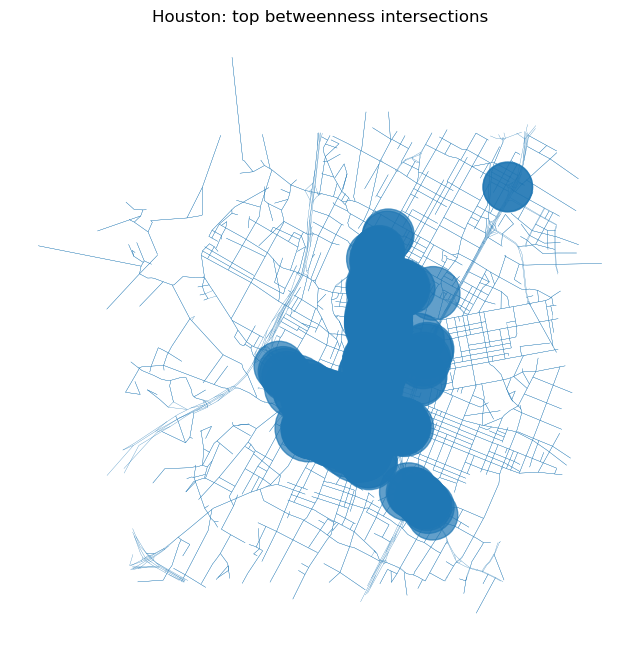

In [497]:
nodes_top_bet_latlon = nodes_top_bet.to_crs(epsg=4326)
print(nodes_top_bet_latlon[["betweenness", "geometry"]])
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# turn bet dict into GeoDataFrame for all nodes
node_records = []
for (x, y), val in bet.items():
    node_records.append({"x": x, "y": y, "betweenness": val})

nodes_gdf = gpd.GeoDataFrame(
    node_records,
    geometry=[Point(r["x"], r["y"]) for r in node_records],
    crs="EPSG:3857",
)

# edges_gdf same as we built earlier from G_houston
top_nodes = nodes_gdf.nlargest(200, "betweenness")

fig, ax = plt.subplots(figsize=(8, 8))
edges_gdf.plot(ax=ax, linewidth=0.2)
top_nodes.plot(
    ax=ax,
    markersize=20 + 20000 * top_nodes["betweenness"],
    alpha=0.7,
)
ax.set_title("Houston: top betweenness intersections")
ax.set_axis_off()
plt.show()


In [502]:
import pickle
import networkx as nx

# 1) Weakly connected components (ignore direction just for connectivity)
components = list(nx.weakly_connected_components(G_houston))
print("Number of weakly connected components:", len(components))

# 2) Take the largest weakly connected component as the main network blob
largest_cc = max(components, key=len)
G_main = G_houston.subgraph(largest_cc).copy()

print("# nodes in main component:", G_main.number_of_nodes())
print("# edges in main component:", G_main.number_of_edges())

# 3) Average total degree (in-degree + out-degree)
deg_main = dict(G_main.degree())     # total degree
avg_deg_main = sum(deg_main.values()) / len(deg_main)
print("Average total degree (main component):", avg_deg_main)

# (optional) also see average in-degree and out-degree separately
out_deg = dict(G_main.out_degree())
in_deg  = dict(G_main.in_degree())

avg_out = sum(out_deg.values()) / len(out_deg)
avg_in  = sum(in_deg.values()) / len(in_deg)

print("Average out-degree (main component):", avg_out)
print("Average in-degree (main component):", avg_in)



Number of weakly connected components: 16191
# nodes in main component: 34363
# edges in main component: 50601
Average total degree (main component): 2.9450862846666475
Average out-degree (main component): 1.4725431423333237
Average in-degree (main component): 1.4725431423333237


In [504]:
deg = dict(G_main.degree())
deg_cent = nx.degree_centrality(G_main)

top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_deg:
    print("node:", node, "degree:", deg[node], "degree centrality:", val)


node: (-10637009.710199531, 3478868.403462683) degree: 10 degree centrality: 0.00029101914906000815
node: (-10608613.666571038, 3463935.411567246) degree: 10 degree centrality: 0.00029101914906000815
node: (-10601989.589139434, 3458966.2677445402) degree: 10 degree centrality: 0.00029101914906000815
node: (-10618549.354138402, 3478388.5455556326) degree: 10 degree centrality: 0.00029101914906000815
node: (-10599508.132974315, 3460761.894239558) degree: 10 degree centrality: 0.00029101914906000815
node: (-10614599.092952011, 3465425.6584241474) degree: 9 degree centrality: 0.00026191723415400735
node: (-10624671.725756949, 3467650.6747970395) degree: 9 degree centrality: 0.00026191723415400735
node: (-10607603.66483107, 3465669.892976643) degree: 9 degree centrality: 0.00026191723415400735
node: (-10612412.78928478, 3472203.789251831) degree: 9 degree centrality: 0.00026191723415400735
node: (-10601353.921451159, 3460476.245175083) degree: 9 degree centrality: 0.00026191723415400735
nod

In [506]:
bet = nx.betweenness_centrality(
    G_main,
    k=200,                    # sample 200 sources (approximation)
    weight="travel_time_s",
    seed=0
)

top_bet = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_bet:
    print("node:", node, "betweenness:", val)


node: (-10626082.355212333, 3472029.697497415) betweenness: 0.09012223500450212
node: (-10626080.874663103, 3471956.391687564) betweenness: 0.09009444105809984
node: (-10626079.650148707, 3471926.2334628375) betweenness: 0.09006664711169757
node: (-10626076.176980592, 3471831.3483534325) betweenness: 0.09003885316529528
node: (-10626113.513537806, 3474873.9960353016) betweenness: 0.08845707202711318
node: (-10626122.819847237, 3474708.794386256) betweenness: 0.08842927808071091
node: (-10626134.14103945, 3474492.5515757655) betweenness: 0.08840148413430862
node: (-10626141.131903471, 3474391.889166599) betweenness: 0.08837369018790635
node: (-10626138.259860609, 3474127.0978306863) betweenness: 0.08834589624150406
node: (-10626082.689170806, 3471647.2988830144) betweenness: 0.08691414420667667
node: (-10626116.775198886, 3471457.712989538) betweenness: 0.0868863502602744
node: (-10626133.551046148, 3471378.025177699) betweenness: 0.08685855631387213
node: (-10626054.180249212, 3471722.

In [511]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

# Same bbox you used in the script
BBOX_HOUSTON = (-95.6, -95.2, 29.6, 29.9)
lon_min, lon_max, lat_min, lat_max = BBOX_HOUSTON

roads_h = gpd.read_file(
    "C:/Users/omair/Downloads/texas-251124-free.shp/gis_osm_roads_free_1.shp",
    bbox=(lon_min, lat_min, lon_max, lat_max)
)

# Keep the same drivable/backbone classes
backbone_classes = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "motorway_link", "trunk_link", "primary_link",
    "secondary_link", "tertiary_link",
    "unclassified", "residential", "living_street",
]

roads_h = roads_h[roads_h["fclass"].isin(backbone_classes)]

# Project to EPSG:3857 to match your graph coordinates
roads_3857 = roads_h.to_crs(epsg=3857)


In [512]:
edge_records = []
for u, v, data in G_main.edges(data=True):
    edge_records.append({
        "u": u,
        "v": v,
        "highway": data.get("highway"),
        "geometry": LineString([u, v]),
    })

edges_gdf = gpd.GeoDataFrame(edge_records, geometry="geometry", crs="EPSG:3857")


In [515]:
# Turn bet dict into a GeoDataFrame
node_records = []
for (x, y), val in top_bet:  # top_bet from above
    node_records.append({
        "x": x,
        "y": y,
        "betweenness": val,
        "geometry": Point(x, y),
    })

nodes_top_bet = gpd.GeoDataFrame(node_records, geometry="geometry", crs="EPSG:3857")


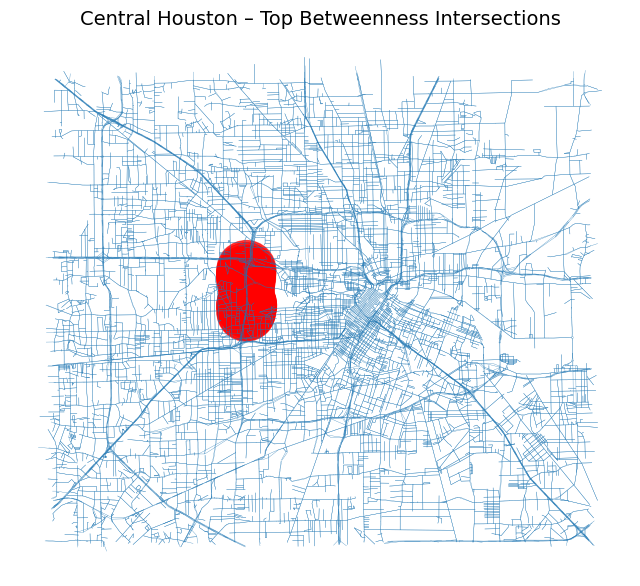

In [517]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the road network (thin lines)
edges_gdf.plot(ax=ax, linewidth=0.2)

# Overlay the top betweenness nodes (bigger dots)
nodes_top_bet.plot(
    ax=ax,
    markersize=20 + 20000 * nodes_top_bet["betweenness"],  # bigger = more important
    color="red",
    alpha=0.7,
)

ax.set_title("Central Houston – Top Betweenness Intersections", fontsize=14)
ax.set_axis_off()
plt.show()


In [518]:
from shapely.geometry import Point

# Make sure roads_3857 has a 'name' column; sometimes it's 'name', sometimes 'name_left'
name_col = "name" if "name" in roads_3857.columns else "name_left"

def get_street_names(point, roads_gdf, radius=30):
    """
    Return a string of unique road names within `radius` meters of this node.
    """
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]

    names = sorted(set(nearby[name_col].dropna()))
    if not names:
        return "Unnamed road"

    # Limit to a few so it doesn’t get too long
    return " & ".join(names[:4])

# Take the single most critical node
top_node, top_bet_val = top_bet[0]
top_point = Point(top_node)

street_names = get_street_names(top_point, roads_3857, radius=30)

print("Most critical intersection in central Houston:")
print("  Coordinates:", top_node)
print("  Streets:", street_names)
print("  Betweenness:", top_bet_val)


Most critical intersection in central Houston:
  Coordinates: (-10626082.355212333, 3472029.697497415)
  Streets: West Loop South
  Betweenness: 0.09012223500450212


In [521]:
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import random

def approx_global_efficiency(G, weight=None, k_sources=200, seed=0):
    """
    Approximate global efficiency:
      E[1 / d(i,j)] over random node pairs, using k_sources random sources.
    """
    rng = random.Random(seed)
    nodes = list(G.nodes())
    n = len(nodes)

    if n <= 1:
        return 0.0

    k_sources = min(k_sources, n)
    sources = rng.sample(nodes, k_sources)

    total_inv_dist = 0.0
    count_pairs = 0

    for s in sources:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, s)
        else:
            lengths = nx.single_source_dijkstra_path_length(G, s, weight=weight)

        for t, d in lengths.items():
            if t == s or d <= 0:
                continue
            total_inv_dist += 1.0 / d
            count_pairs += 1

    if count_pairs == 0:
        return 0.0

    # Average 1/d over sampled pairs ≈ average over all pairs
    avg_inv_dist = total_inv_dist / count_pairs
    return avg_inv_dist

base_eff = approx_global_efficiency(G_main, weight="travel_time_s", k_sources=200, seed=0)
print("Baseline approximate global efficiency:", base_eff)


Baseline approximate global efficiency: 0.0012257929454402802


In [522]:
# Make sure we know the name column
if "name" in roads_3857.columns:
    road_name_col = "name"
elif "name_left" in roads_3857.columns:
    road_name_col = "name_left"
else:
    road_name_col = None  # fallback later

def get_intersection_names(point, roads_gdf, radius=30):
    """
    Return a string like 'Road A & Road B' for roads intersecting near this point.
    """
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]

    if road_name_col is None:
        return "Unknown roads"

    names = sorted(set(nearby[road_name_col].dropna()))
    if not names:
        return "Unnamed road"

    # up to 3–4 names
    return " & ".join(names[:4])

def get_main_road_name(point, roads_gdf, radius=30):
    """
    Pick one 'main' road name near the intersection (for the road_name column).
    Prefer a named road; if none, fall back to fclass.
    """
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]

    if nearby.empty:
        return "Unknown"

    # Try named roads
    if road_name_col is not None:
        named = nearby[nearby[road_name_col].notna()]
        if not named.empty:
            return str(named.iloc[0][road_name_col])

    # Fall back to fclass (motorway/primary/etc.)
    if "fclass" in nearby.columns:
        return str(nearby.iloc[0]["fclass"])

    return "Unknown"


### Node Closure

In [523]:
# 1) Pick top-k betweenness nodes
k = 10  # or 20 if you want a bigger table
top_bet_nodes = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:k]

rows = []

for (node, bval) in top_bet_nodes:
    print("Evaluating closure for node:", node, "betweenness:", bval)

    # Make a copy and remove this node (closure)
    G_closed = G_main.copy()
    if node in G_closed:
        G_closed.remove_node(node)

    eff_closed = approx_global_efficiency(G_closed, weight="travel_time_s", k_sources=200, seed=0)

    eff_drop_pct = 0.0
    if base_eff > 0:
        eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

    # build point for naming
    x, y = node
    pt = Point(x, y)

    intersection_names = get_intersection_names(pt, roads_3857, radius=30)
    main_road = get_main_road_name(pt, roads_3857, radius=30)

    rows.append({
        "intersection_names": intersection_names,
        "road_name": main_road,
        "betweenness": bval,
        "eff_drop_pct": eff_drop_pct,
    })

node_closures_df = pd.DataFrame(rows)
node_closures_df


Evaluating closure for node: (-10626082.355212333, 3472029.697497415) betweenness: 0.09012223500450212
Evaluating closure for node: (-10626080.874663103, 3471956.391687564) betweenness: 0.09009444105809984
Evaluating closure for node: (-10626079.650148707, 3471926.2334628375) betweenness: 0.09006664711169757
Evaluating closure for node: (-10626076.176980592, 3471831.3483534325) betweenness: 0.09003885316529528
Evaluating closure for node: (-10626113.513537806, 3474873.9960353016) betweenness: 0.08845707202711318
Evaluating closure for node: (-10626122.819847237, 3474708.794386256) betweenness: 0.08842927808071091
Evaluating closure for node: (-10626134.14103945, 3474492.5515757655) betweenness: 0.08840148413430862
Evaluating closure for node: (-10626141.131903471, 3474391.889166599) betweenness: 0.08837369018790635
Evaluating closure for node: (-10626138.259860609, 3474127.0978306863) betweenness: 0.08834589624150406
Evaluating closure for node: (-10626082.689170806, 3471647.2988830144

,intersection_names,road_name,betweenness,eff_drop_pct
0,West Loop South,West Loop South,0.090122,-0.014011
1,Post Oak Boulevard & West Loop South,Post Oak Boulevard,0.090094,0.543931
2,West Loop South,West Loop South,0.090067,-1.280185
3,West Loop South,West Loop South,0.090039,0.585765
4,West Loop North,West Loop North,0.088457,-0.428871
5,West Loop North,West Loop North,0.088429,-0.503838
6,West Loop North,West Loop North,0.088401,-0.785737
7,West Loop North,West Loop North,0.088374,-0.480337
8,West Loop North,West Loop North,0.088346,-0.446668
9,West Loop South,West Loop South,0.086914,-0.502143


In [524]:
node_closures_df.sort_values("eff_drop_pct", ascending=False)

,intersection_names,road_name,betweenness,eff_drop_pct
3,West Loop South,West Loop South,0.090039,0.585765
1,Post Oak Boulevard & West Loop South,Post Oak Boulevard,0.090094,0.543931
0,West Loop South,West Loop South,0.090122,-0.014011
4,West Loop North,West Loop North,0.088457,-0.428871
8,West Loop North,West Loop North,0.088346,-0.446668
7,West Loop North,West Loop North,0.088374,-0.480337
9,West Loop South,West Loop South,0.086914,-0.502143
5,West Loop North,West Loop North,0.088429,-0.503838
6,West Loop North,West Loop North,0.088401,-0.785737
2,West Loop South,West Loop South,0.090067,-1.280185


## Edge Closure

In [299]:
import random
import networkx as nx

class SeqRandom(random.Random):
    # match random.Random.sample signature
    def sample(self, population, k, counts=None):
        # convert NodeView or other iterables to a list
        return super().sample(list(population), k, counts=counts)

rng = SeqRandom(42)

print("Computing edge betweenness centrality (sampled)...")

edge_btw = nx.edge_betweenness_centrality(
    G_main,
    k=min(200, G_main.number_of_nodes()),  # sample 500 sources or fewer
    weight="travel_time_s",
    seed=rng
)


Computing edge betweenness centrality (sampled)...


In [300]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

def edge_closure_impact_with_roadname(G, edge_btw, base_eff, roads_gdf, k=10):
    """
    For the top-k edges by edge betweenness:
      - remove each edge (road segment closure)
      - recompute approximate time-weighted global efficiency
      - compute % drop vs base_eff
      - attach nearest single road_name for interpretability

    Returns a GeoDataFrame with:
      edge, betweenness, eff_closed, eff_drop_pct, road_name, geometry (midpoint)
    """
    results = []

    # 1. Get top-k critical edges
    top_edges = sorted(edge_btw.items(), key=lambda x: x[1], reverse=True)[:k]

    for (u, v), bscore in top_edges:
        print("Evaluating edge closure:", (u, v), "betweenness:", bscore)

        # 2. Copy graph and remove this edge
        G_tmp = G.copy()
        if G_tmp.has_edge(u, v):
            G_tmp.remove_edge(u, v)
        else:
            # if for some reason edge isn't present
            results.append(((u, v), bscore, None, None, "Unknown"))
            continue

        # 3. Approximate global efficiency after closure (time-weighted)
        eff_closed = approx_global_efficiency(
            G_tmp,
            weight="travel_time_s",
            k_sources=200,
            seed=0
        )

        eff_drop_pct = 0.0
        if base_eff > 0:
            eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

        # 4. Midpoint of the edge for naming + plotting
        midpoint = Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)

        # Build a mini GeoDataFrame for nearest-join to roads
        gdf_mid = gpd.GeoDataFrame(
            {"betweenness": [bscore]},
            geometry=[midpoint],
            crs="EPSG:3857"
        )

        if road_name_col is not None:
            match = gpd.sjoin_nearest(
                gdf_mid,
                roads_gdf[[road_name_col, "geometry"]],
                how="left",
                distance_col="dist",
                max_distance=50
            ).iloc[0]

            if pd.notna(match[road_name_col]):
                road_name = match[road_name_col]
            else:
                road_name = "Unnamed road"
        else:
            road_name = "Unknown road"

        results.append(((u, v), bscore, eff_closed, eff_drop_pct, road_name))

    df = pd.DataFrame(
        results,
        columns=["edge", "betweenness", "efficiency_after", "eff_drop_pct", "road_name"]
    )

    # Add midpoint geometry for mapping
    df_gdf = gpd.GeoDataFrame(
        df,
        geometry=[Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0) for (u, v) in df["edge"]],
        crs="EPSG:3857"
    )

    return df_gdf


In [301]:
k_edges = 10  # top 10 most critical segments

edge_impact = edge_closure_impact_with_roadname(
    G_main,
    edge_btw,
    base_eff,
    roads_3857,
    k=k_edges
)

edge_impact[["road_name", "betweenness", "eff_drop_pct"]]


Evaluating edge closure: ((-10626138.259860609, 3474127.0978306863), (-10626141.131903471, 3474391.889166599)) betweenness: 0.0006186225462971086
Evaluating edge closure: ((-10626134.14103945, 3474492.5515757655), (-10626141.131903471, 3474391.889166599)) betweenness: 0.0006185937518057427
Evaluating edge closure: ((-10626134.14103945, 3474492.5515757655), (-10626122.819847237, 3474708.794386256)) betweenness: 0.0006185649573143769
Evaluating edge closure: ((-10626113.513537806, 3474873.9960353016), (-10626122.819847237, 3474708.794386256)) betweenness: 0.0006185412442038403
Evaluating edge closure: ((-10626079.650148707, 3471926.2334628375), (-10626076.176980592, 3471831.3483534325)) betweenness: 0.0005776047933464832
Evaluating edge closure: ((-10626079.650148707, 3471926.2334628375), (-10626080.874663103, 3471956.391687564)) betweenness: 0.0005775776926487272
Evaluating edge closure: ((-10626082.355212333, 3472029.697497415), (-10626080.874663103, 3471956.391687564)) betweenness: 0.

,road_name,betweenness,eff_drop_pct
0,West Loop North,0.000619,0.406325
1,West Loop North,0.000619,0.406287
2,West Loop North,0.000619,0.406290
3,West Loop North,0.000619,0.406380
4,West Loop South,0.000578,0.294505
5,West Loop South,0.000578,0.294455
6,West Loop South,0.000578,0.294416
7,West Loop South,0.000569,0.289348
8,West Loop South,0.000566,0.255596
9,West Loop South,0.000566,0.255299


In [305]:
road_rank = (
    edge_impact
    .groupby("road_name", as_index=False)
    .agg({
        "betweenness": "max",     # max betweenness of any segment on that road
        "eff_drop_pct": "max"     # worst-case drop if a segment is closed
    })
    .sort_values("eff_drop_pct", ascending=False)
)

road_rank.head(10)


,road_name,betweenness,eff_drop_pct
0,West Loop North,0.000619,0.406380
1,West Loop South,0.000578,0.294505


## Central Austin

In [431]:
import pickle
import networkx as nx

G_austin_dir = pickle.load(open("C:/Users/omair/Downloads/texas-251124-free.shp/austin_central_roads.pkl", "rb"))

# undirected view for structural stuff
G_austin = G_austin_dir.to_directed()

print("Directed?", nx.is_directed(G_austin))
print("# nodes:", G_austin.number_of_nodes())
print("# edges:", G_austin.number_of_edges())

degrees = dict(G_austin.degree())
avg_deg = sum(degrees.values()) / len(degrees)
print("Average degree:", avg_deg)


Directed? True
# nodes: 7373
# edges: 11313
Average degree: 3.068764410687644


In [433]:
# For a directed graph G_austin (nx.DiGraph)

# 1) Use weakly connected components (ignore directions for connectivity)
components = list(nx.weakly_connected_components(G_austin))
print("Number of weakly connected components:", len(components))

# 2) Take the largest one = main road blob
largest_cc = max(components, key=len)
G_main = G_austin.subgraph(largest_cc).copy()

print("# nodes in main component:", G_main.number_of_nodes())
print("# edges in main component:", G_main.number_of_edges())

# 3) Degree on a directed graph = in-degree + out-degree
deg_main = dict(G_main.degree())   # total degree
avg_deg_main = sum(deg_main.values()) / len(deg_main)
print("Average total degree (main component):", avg_deg_main)

out_deg = dict(G_main.out_degree())
in_deg  = dict(G_main.in_degree())

avg_out = sum(out_deg.values()) / len(out_deg)
avg_in  = sum(in_deg.values()) / len(in_deg)

print("Average out-degree (main component):", avg_out)
print("Average in-degree  (main component):", avg_in)



Number of weakly connected components: 1288
# nodes in main component: 4268
# edges in main component: 7792
Average total degree (main component): 3.6513589503280226
Average out-degree (main component): 1.8256794751640113
Average in-degree  (main component): 1.8256794751640113


In [435]:
# degree centrality
deg_cent = nx.degree_centrality(G_main)
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_deg:
    print("node:", node, "degree:", G_main.degree(node), "degree centrality:", val)


node: (-10878132.191169342, 3544006.7039943035) degree: 10 degree centrality: 0.002343566908835247
node: (-10876813.945759367, 3543544.0236157076) degree: 9 degree centrality: 0.0021092102179517225
node: (-10879925.759673053, 3541290.025576082) degree: 9 degree centrality: 0.0021092102179517225
node: (-10882135.451565301, 3543299.298966479) degree: 8 degree centrality: 0.0018748535270681978
node: (-10881424.565297095, 3537896.6672202493) degree: 8 degree centrality: 0.0018748535270681978
node: (-10880833.447669033, 3542081.522911235) degree: 8 degree centrality: 0.0018748535270681978
node: (-10879393.296284692, 3542710.839331587) degree: 8 degree centrality: 0.0018748535270681978
node: (-10878424.0931381, 3537228.8354505794) degree: 8 degree centrality: 0.0018748535270681978
node: (-10884714.401340459, 3542191.3470650944) degree: 8 degree centrality: 0.0018748535270681978
node: (-10884886.523537124, 3542286.886345458) degree: 8 degree centrality: 0.0018748535270681978
node: (-10879386.

In [437]:
bet = nx.betweenness_centrality(
    G_main,
    k=200,
    weight="travel_time_s",
    seed=0
)

top_bet = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_bet:
    print("node:", node, "betweenness:", val)


node: (-10881308.603783535, 3536841.2034721985) betweenness: 0.15236457880455234
node: (-10881257.942283275, 3537576.292776327) betweenness: 0.15045484865095476
node: (-10880874.157206817, 3537452.1252105352) betweenness: 0.13779365426246257
node: (-10881132.351633763, 3536646.3158207787) betweenness: 0.13281944613372437
node: (-10880524.480422337, 3540849.4639192782) betweenness: 0.1249976416003892
node: (-10880532.239390844, 3540761.425623768) betweenness: 0.11906798222844536
node: (-10880581.487133574, 3539815.0365376514) betweenness: 0.11797654037884478
node: (-10880583.435224662, 3540082.536746914) betweenness: 0.11724617703587899
node: (-10880595.580181107, 3539935.25688497) betweenness: 0.11639154641465575
node: (-10880528.354340617, 3540806.379352495) betweenness: 0.11633175744115455
node: (-10880526.339457832, 3540829.778044249) betweenness: 0.11627196846765334
node: (-10880598.697126849, 3539878.356398018) betweenness: 0.11609142921433595
node: (-10882096.088993357, 3537838.2

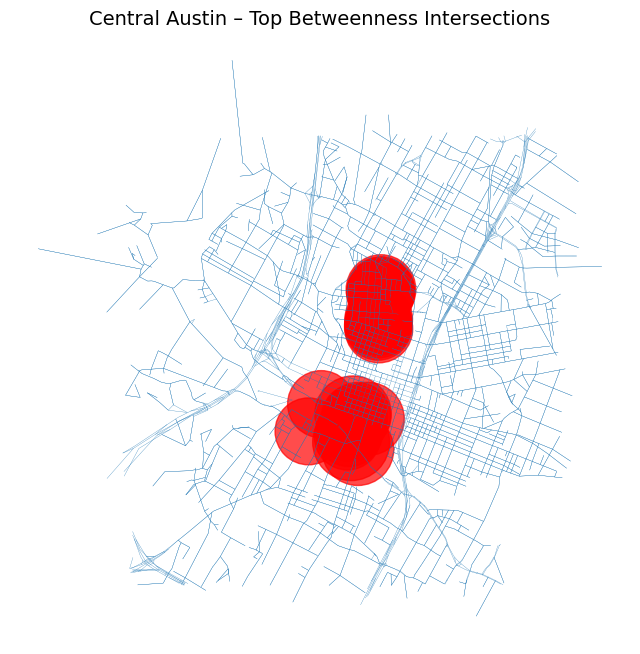

In [439]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

BBOX_AUSTIN = (-97.8, -97.7, 30.23, 30.32)
lon_min, lon_max, lat_min, lat_max = BBOX_AUSTIN

roads_a = gpd.read_file(
    "C:/Users/omair/Downloads/texas-251124-free.shp/gis_osm_roads_free_1.shp",
    bbox=(lon_min, lat_min, lon_max, lat_max)
)

backbone_classes = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "motorway_link", "trunk_link", "primary_link",
    "secondary_link", "tertiary_link",
    "unclassified", "residential", "living_street",
]

roads_a = roads_a[roads_a["fclass"].isin(backbone_classes)]
roads_3857 = roads_a.to_crs(epsg=3857)

# edges from G_main
edge_records = []
for u, v, data in G_main.edges(data=True):
    edge_records.append({
        "u": u,
        "v": v,
        "highway": data.get("highway"),
        "geometry": LineString([u, v]),
    })

edges_gdf = gpd.GeoDataFrame(edge_records, geometry="geometry", crs="EPSG:3857")

# nodes (top betweenness)
node_records = []
for (x, y), val in top_bet:
    node_records.append({
        "x": x,
        "y": y,
        "betweenness": val,
        "geometry": Point(x, y),
    })
nodes_top_bet = gpd.GeoDataFrame(node_records, geometry="geometry", crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(8, 8))
edges_gdf.plot(ax=ax, linewidth=0.2)
nodes_top_bet.plot(
    ax=ax,
    markersize=20 + 20000 * nodes_top_bet["betweenness"],
    color="red",
    alpha=0.7,
)
ax.set_title("Central Austin – Top Betweenness Intersections", fontsize=14)
ax.set_axis_off()
plt.show()


In [440]:
# name column (could be 'name' or 'name_left')
name_col = "name" if "name" in roads_3857.columns else "name_left"

def get_street_names(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    names = sorted(set(nearby[name_col].dropna()))
    if not names:
        return "Unnamed road"
    return " & ".join(names[:4])

top_node, top_bet_val = top_bet[0]
top_point = Point(top_node)

street_names = get_street_names(top_point, roads_3857, radius=30)
print("Most critical intersection in central Austin:")
print("  Coordinates:", top_node)
print("  Streets:", street_names)
print("  Betweenness:", top_bet_val)


Most critical intersection in central Austin:
  Coordinates: (-10881308.603783535, 3536841.2034721985)
  Streets: Barton Springs Road & East Riverside Drive
  Betweenness: 0.15236457880455234


In [441]:
import random

def approx_global_efficiency(G, weight=None, k_sources=200, seed=0):
    rng = random.Random(seed)
    nodes = list(G.nodes())
    n = len(nodes)
    if n <= 1:
        return 0.0

    k_sources = min(k_sources, n)
    sources = rng.sample(nodes, k_sources)

    total_inv = 0.0
    count = 0

    for s in sources:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, s)
        else:
            lengths = nx.single_source_dijkstra_path_length(G, s, weight=weight)
        for t, d in lengths.items():
            if t == s or d <= 0:
                continue
            total_inv += 1.0 / d
            count += 1

    if count == 0:
        return 0.0

    return total_inv / count

base_eff = approx_global_efficiency(G_main, weight="travel_time_s", k_sources=200, seed=0)
print("Baseline approximate global efficiency (Austin):", base_eff)


Baseline approximate global efficiency (Austin): 0.004258743128767823


### Node Closure

In [471]:
if "name" in roads_3857.columns:
    road_name_col = "name"
elif "name_left" in roads_3857.columns:
    road_name_col = "name_left"
else:
    road_name_col = None


In [473]:
def get_intersection_names(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    if road_name_col is None:
        return "Unknown roads"
    names = sorted(set(nearby[road_name_col].dropna()))
    if not names:
        return "Unnamed road"
    return " & ".join(names[:4])

def get_main_road_name(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    if nearby.empty:
        return "Unknown"
    if road_name_col is not None:
        named = nearby[nearby[road_name_col].notna()]
        if not named.empty:
            return str(named.iloc[0][road_name_col])
    if "fclass" in nearby.columns:
        return str(nearby.iloc[0]["fclass"])
    return "Unknown"


In [475]:
k_nodes = 10
top_bet_nodes = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:k_nodes]

rows = []
for (node, bval) in top_bet_nodes:
    print("Evaluating node closure:", node, "betweenness:", bval)
    
    G_closed = G_main.copy()
    if node in G_closed:
        G_closed.remove_node(node)

    eff_closed = approx_global_efficiency(
        G_closed, weight="travel_time_s", k_sources=200, seed=0
    )
    eff_drop_pct = 0.0
    if base_eff > 0:
        eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

    pt = Point(node)
    intersection_names = get_intersection_names(pt, roads_3857, radius=30)
    main_road = get_main_road_name(pt, roads_3857, radius=30)

    rows.append({
        "node": node,
        "intersection_names": intersection_names,
        "road_name": main_road,
        "betweenness": bval,
        "eff_drop_pct": eff_drop_pct,
        "geometry": pt,        # <--- important for plotting
    })

node_closures_austin = pd.DataFrame(rows)


Evaluating node closure: (-10881308.603783535, 3536841.2034721985) betweenness: 0.15236457880455234
Evaluating node closure: (-10881257.942283275, 3537576.292776327) betweenness: 0.15045484865095476
Evaluating node closure: (-10880874.157206817, 3537452.1252105352) betweenness: 0.13779365426246257
Evaluating node closure: (-10881132.351633763, 3536646.3158207787) betweenness: 0.13281944613372437
Evaluating node closure: (-10880524.480422337, 3540849.4639192782) betweenness: 0.1249976416003892
Evaluating node closure: (-10880532.239390844, 3540761.425623768) betweenness: 0.11906798222844536
Evaluating node closure: (-10880581.487133574, 3539815.0365376514) betweenness: 0.11797654037884478
Evaluating node closure: (-10880583.435224662, 3540082.536746914) betweenness: 0.11724617703587899
Evaluating node closure: (-10880595.580181107, 3539935.25688497) betweenness: 0.11639154641465575
Evaluating node closure: (-10880528.354340617, 3540806.379352495) betweenness: 0.11633175744115455


In [476]:
node_closures_austin_sorted = node_closures_austin.sort_values(
    "eff_drop_pct",
    ascending=False
)

# Top 10 most impactful node closures
top_nodes_gdf = gpd.GeoDataFrame(
    node_closures_austin_sorted.head(10),
    geometry="geometry",
    crs="EPSG:3857"
)

top_nodes_gdf[["intersection_names", "road_name", "betweenness", "eff_drop_pct"]]


,intersection_names,road_name,betweenness,eff_drop_pct
2,Congress Avenue & East Cesar Chavez Street & West Cesar Chavez Street,East Cesar Chavez Street,0.137794,4.622795
6,Guadalupe Street & West Martin Luther King Jr Boulevard,Guadalupe Street,0.117977,4.037031
5,Guadalupe Street & West 25th Street,West 25th Street,0.119068,2.699677
7,Guadalupe Street & West 21st Street,Guadalupe Street,0.117246,2.496603
3,East Riverside Drive & South Congress Avenue,East Riverside Drive,0.132819,2.370894
1,Guadalupe Street & South 1st Street & West Cesar Chavez Street,West Cesar Chavez Street,0.150455,2.320631
8,Guadalupe Street & West 20th Street,West 20th Street,0.116392,2.273862
4,Guadalupe Street & West Dean Keeton Street,West Dean Keeton Street,0.124998,1.768320
9,Guadalupe Street,Guadalupe Street,0.116332,1.390501
0,Barton Springs Road & East Riverside Drive,Barton Springs Road,0.152365,0.774009


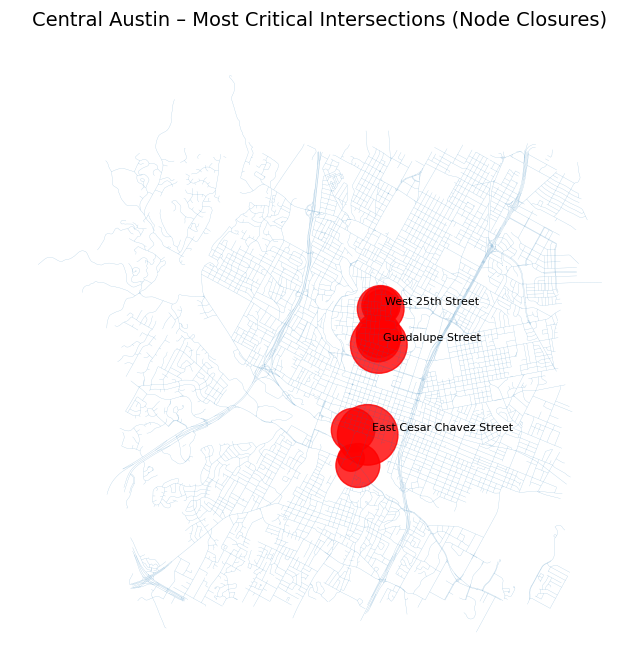

In [485]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# 1) background road network (thin, light)
roads_3857.plot(ax=ax, linewidth=0.2, alpha=0.4)

# 2) overlay the top critical intersections (bigger points)
# size them by efficiency drop or betweenness
sizes = 50 + 400 * top_nodes_gdf["eff_drop_pct"]  # tweak the scaling if needed

top_nodes_gdf.plot(
    ax=ax,
    markersize=sizes,
    color="red",
    alpha=0.8,
)

for _, row in top_nodes_gdf.head(3).iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.annotate(
        row["road_name"],
        xy=(x, y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=8,
    )


ax.set_title("Central Austin – Most Critical Intersections (Node Closures)", fontsize=14)
ax.set_axis_off()

plt.show()


### Edge Closure

In [447]:
class SeqRandom(random.Random):
    def sample(self, population, k, counts=None):
        return super().sample(list(population), k, counts=counts)

rng = SeqRandom(42)

print("Computing edge betweenness (Austin)...")
edge_btw = nx.edge_betweenness_centrality(
    G_main,
    k=min(500, G_main.number_of_nodes()),
    weight="travel_time_s",
    seed=rng
)


Computing edge betweenness (Austin)...


In [448]:
def edge_closure_impact_with_roadname(G, edge_btw, base_eff, roads_gdf, k=10):
    results = []
    top_edges = sorted(edge_btw.items(), key=lambda x: x[1], reverse=True)[:k]

    for (u, v), bscore in top_edges:
        print("Evaluating edge closure:", (u, v), "betweenness:", bscore)
        G_tmp = G.copy()
        if G_tmp.has_edge(u, v):
            G_tmp.remove_edge(u, v)
        else:
            results.append(((u, v), bscore, None, None, "Unknown"))
            continue

        eff_closed = approx_global_efficiency(
            G_tmp,
            weight="travel_time_s",
            k_sources=200,
            seed=0
        )

        eff_drop_pct = 0.0
        if base_eff > 0:
            eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

        midpoint = Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
        gdf_mid = gpd.GeoDataFrame(
            {"betweenness": [bscore]},
            geometry=[midpoint],
            crs="EPSG:3857"
        )

        if road_name_col is not None:
            match = gpd.sjoin_nearest(
                gdf_mid,
                roads_gdf[[road_name_col, "geometry"]],
                how="left",
                distance_col="dist",
                max_distance=50
            ).iloc[0]
            road_name = match[road_name_col] if pd.notna(match[road_name_col]) else "Unnamed road"
        else:
            road_name = "Unknown road"

        results.append(((u, v), bscore, eff_closed, eff_drop_pct, road_name))

    df = pd.DataFrame(
        results,
        columns=["edge", "betweenness", "efficiency_after", "eff_drop_pct", "road_name"]
    )

    df_gdf = gpd.GeoDataFrame(
        df,
        geometry=[Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0) for (u, v) in df["edge"]],
        crs="EPSG:3857"
    )
    return df_gdf

k_edges = 10
edge_impact_austin = edge_closure_impact_with_roadname(
    G_main, edge_btw, base_eff, roads_3857, k=k_edges
)

edge_impact_austin[["road_name", "betweenness", "eff_drop_pct"]].head(10)


Evaluating edge closure: ((-10880911.660743266, 3538658.8473858805), (-10880935.316135058, 3538585.286420385)) betweenness: 0.009320181098199407
Evaluating edge closure: ((-10880935.316135058, 3538585.286420385), (-10880949.988043945, 3538539.876561786)) betweenness: 0.009294208578333449
Evaluating edge closure: ((-10880522.933081415, 3540864.263798352), (-10880524.480422337, 3540849.4639192782)) betweenness: 0.008518602144704164
Evaluating edge closure: ((-10879544.902299203, 3538429.4911985276), (-10879525.94458992, 3538485.5989117017)) betweenness: 0.008508443759555746
Evaluating edge closure: ((-10880778.83432685, 3539078.2316858466), (-10880800.84219018, 3539009.2184502124)) betweenness: 0.0083609549892387
Evaluating edge closure: ((-10880800.84219018, 3539009.2184502124), (-10880810.549249778, 3538978.785202377)) betweenness: 0.008334982469372743
Evaluating edge closure: ((-10880828.883569911, 3538921.2960817916), (-10880872.55420615, 3538779.5465569096)) betweenness: 0.008328722

,road_name,betweenness,eff_drop_pct
0,Guadalupe Street,0.009320,0.205267
1,Guadalupe Street,0.009294,0.193635
2,Guadalupe Street,0.008519,0.109460
3,Purple Heart Trail,0.008508,0.653092
4,Guadalupe Street,0.008361,0.182935
5,Guadalupe Street,0.008335,0.174280
6,Guadalupe Street,0.008329,0.170349
7,Guadalupe Street,0.008309,0.166078
8,Guadalupe Street,0.008245,0.257446
9,Guadalupe Street,0.008175,0.284430


In [449]:
def edge_closure_impact_with_roadname(G, edge_btw, base_eff, roads_gdf, k=10):
    results = []
    top_edges = sorted(edge_btw.items(), key=lambda x: x[1], reverse=True)[:k]

    for (u, v), bscore in top_edges:
        print("Evaluating edge closure:", (u, v), "betweenness:", bscore)
        G_tmp = G.copy()
        if G_tmp.has_edge(u, v):
            G_tmp.remove_edge(u, v)
        else:
            # if somehow edge is missing
            results.append(((u, v), None, None, bscore, None, None, None))
            continue

        # 1. Efficiency after removing this segment
        eff_closed = approx_global_efficiency(
            G_tmp,
            weight="travel_time_s",
            k_sources=200,
            seed=0
        )

        eff_drop_pct = 0.0
        if base_eff > 0:
            eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

        # 2. Midpoint for road_name lookup (same as before)
        midpoint = Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
        gdf_mid = gpd.GeoDataFrame(
            {"betweenness": [bscore]},
            geometry=[midpoint],
            crs="EPSG:3857"
        )

        if road_name_col is not None:
            match = gpd.sjoin_nearest(
                gdf_mid,
                roads_gdf[[road_name_col, "geometry"]],
                how="left",
                distance_col="dist",
                max_distance=50
            ).iloc[0]
            if pd.notna(match[road_name_col]):
                road_name = match[road_name_col]
            else:
                road_name = "Unnamed road"
        else:
            road_name = "Unknown road"

        # 3. NEW: label the two endpoints (u and v) as intersections
        pt_u = Point(u)
        pt_v = Point(v)

        from_intersection = get_intersection_names(pt_u, roads_gdf, radius=30)
        to_intersection   = get_intersection_names(pt_v, roads_gdf, radius=30)

        results.append((
            (u, v),
            from_intersection,
            to_intersection,
            bscore,
            eff_closed,
            eff_drop_pct,
            road_name
        ))

    df = pd.DataFrame(
        results,
        columns=[
            "edge",
            "from_intersection",
            "to_intersection",
            "betweenness",
            "efficiency_after",
            "eff_drop_pct",
            "road_name"
        ]
    )

    df_gdf = gpd.GeoDataFrame(
        df,
        geometry=[
            Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
            for (u, v) in df["edge"]
        ],
        crs="EPSG:3857"
    )
    return df_gdf

k_edges = 10
edge_impact_austin = edge_closure_impact_with_roadname(
    G_main, edge_btw, base_eff, roads_3857, k=k_edges
)


Evaluating edge closure: ((-10880911.660743266, 3538658.8473858805), (-10880935.316135058, 3538585.286420385)) betweenness: 0.009320181098199407
Evaluating edge closure: ((-10880935.316135058, 3538585.286420385), (-10880949.988043945, 3538539.876561786)) betweenness: 0.009294208578333449
Evaluating edge closure: ((-10880522.933081415, 3540864.263798352), (-10880524.480422337, 3540849.4639192782)) betweenness: 0.008518602144704164
Evaluating edge closure: ((-10879544.902299203, 3538429.4911985276), (-10879525.94458992, 3538485.5989117017)) betweenness: 0.008508443759555746
Evaluating edge closure: ((-10880778.83432685, 3539078.2316858466), (-10880800.84219018, 3539009.2184502124)) betweenness: 0.0083609549892387
Evaluating edge closure: ((-10880800.84219018, 3539009.2184502124), (-10880810.549249778, 3538978.785202377)) betweenness: 0.008334982469372743
Evaluating edge closure: ((-10880828.883569911, 3538921.2960817916), (-10880872.55420615, 3538779.5465569096)) betweenness: 0.008328722

In [450]:
edge_impact_austin[
    ["road_name", "from_intersection", "to_intersection", "betweenness", "eff_drop_pct"]
].head(10)


,road_name,from_intersection,to_intersection,betweenness,eff_drop_pct
0,Guadalupe Street,Guadalupe Street & West 10th Street,Guadalupe Street,0.009320,0.205267
1,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 9th Street,0.009294,0.193635
2,Guadalupe Street,Guadalupe Street & West Dean Keeton Street,Guadalupe Street & West Dean Keeton Street,0.008519,0.109460
3,Purple Heart Trail,Purple Heart Trail,Purple Heart Trail,0.008508,0.653092
4,Guadalupe Street,Guadalupe Street & West 13th Street,Guadalupe Street,0.008361,0.182935
5,Guadalupe Street,Guadalupe Street,Guadalupe Street,0.008335,0.174280
6,Guadalupe Street,Guadalupe Street & West 12th Street,Guadalupe Street & West 11th Street,0.008329,0.170349
7,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 12th Street,0.008309,0.166078
8,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 14th Street,0.008245,0.257446
9,Guadalupe Street,Guadalupe Street & West 14th Street,Guadalupe Street,0.008175,0.284430


In [451]:
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Start from your critical edge impact GeoDataFrame
# edge_impact_austin already has columns like: edge, road_name, eff_drop_pct, etc.

# Create a new geometry column for the full segment (not just midpoint)
edge_impact_austin["segment_geom"] = edge_impact_austin["edge"].apply(
    lambda e: LineString([e[0], e[1]])
)

# New GeoDataFrame that uses the segment geometry
crit_edges_gdf = gpd.GeoDataFrame(
    edge_impact_austin,
    geometry="segment_geom",
    crs="EPSG:3857"
)


In [452]:
crit_top10 = crit_edges_gdf.sort_values("eff_drop_pct", ascending=False).head(10)


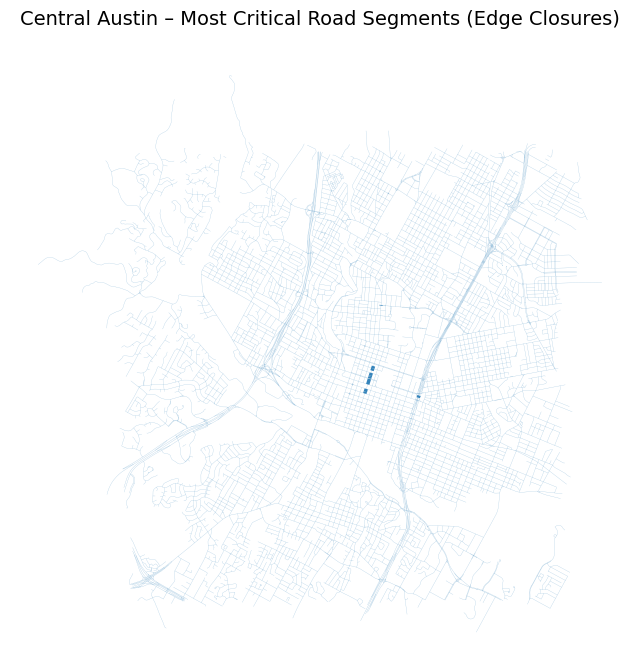

In [453]:
fig, ax = plt.subplots(figsize=(8, 8))

# 1) background road network (thin, light)
roads_3857.plot(ax=ax, linewidth=0.2, alpha=0.4)

# 2) overlay the top critical edges (thicker lines)
crit_top10.plot(
    ax=ax,
    linewidth=2.5,
    alpha=0.9,
)

ax.set_title("Central Austin – Most Critical Road Segments (Edge Closures)", fontsize=14)
ax.set_axis_off()

plt.show()


In [454]:
crit_top3 = crit_top10.head(3)

for _, row in crit_top3.iterrows():
    # use midpoint of the segment for label position
    mid = row["segment_geom"].interpolate(0.5, normalized=True)
    ax.annotate(
        text=row["road_name"],
        xy=(mid.x, mid.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=8,
    )

plt.show()


In [455]:
crit_top10[["road_name", "from_intersection", "to_intersection", "betweenness", "eff_drop_pct"]]


,road_name,from_intersection,to_intersection,betweenness,eff_drop_pct
3,Purple Heart Trail,Purple Heart Trail,Purple Heart Trail,0.008508,0.653092
9,Guadalupe Street,Guadalupe Street & West 14th Street,Guadalupe Street,0.008175,0.284430
8,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 14th Street,0.008245,0.257446
0,Guadalupe Street,Guadalupe Street & West 10th Street,Guadalupe Street,0.009320,0.205267
1,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 9th Street,0.009294,0.193635
4,Guadalupe Street,Guadalupe Street & West 13th Street,Guadalupe Street,0.008361,0.182935
5,Guadalupe Street,Guadalupe Street,Guadalupe Street,0.008335,0.174280
6,Guadalupe Street,Guadalupe Street & West 12th Street,Guadalupe Street & West 11th Street,0.008329,0.170349
7,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 12th Street,0.008309,0.166078
2,Guadalupe Street,Guadalupe Street & West Dean Keeton Street,Guadalupe Street & West Dean Keeton Street,0.008519,0.109460
